In [1]:
import fiona
import geopandas as gpd
import pandas as pd
import shapely
from shapely import geometry
import json
import googlemaps
import re
from functools import partial
import ast 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import contextily as cx

In [55]:
places_df = pd.read_csv('../data/places_GP_v2.csv')

In [3]:
places_df['title_agg'] = places_df['title']

In [9]:
places_df.loc[15297, 'title_agg'] = 'Городской сад, парк культуры и отдыха'

# Распределение категорий по нормированному рейтингу
Рейтинг определяется как сумма нормированных показателей от 0 до 1: количество фотографий, количество отзывов и рейтинг места

Text(0.5, 1.0, 'Распределение категорий (2ого уровня) по среднему нормированному рейтингу')

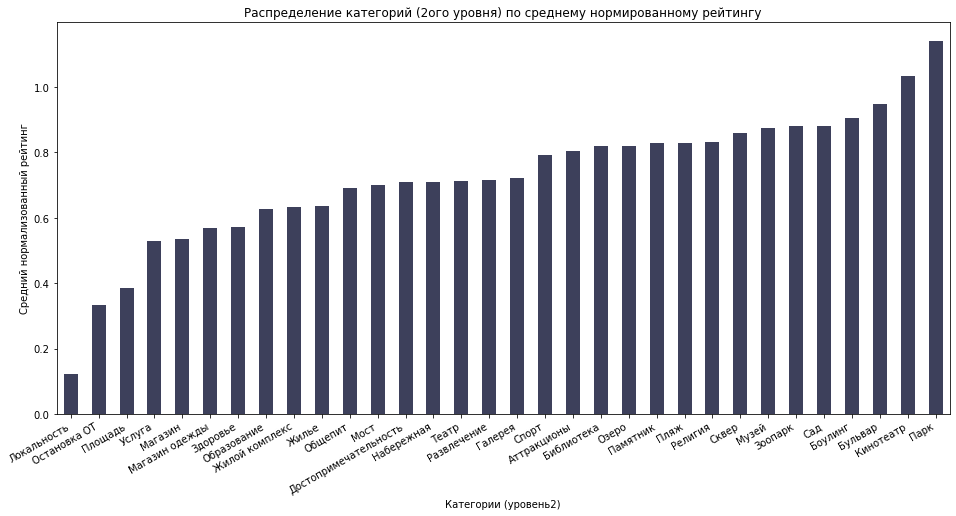

In [9]:
places_df.groupby('category_2').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий (2ого уровня) по среднему нормированному рейтингу')

Text(0.5, 1.0, 'Распределение категорий (2ого уровня) по медиане нормированного рейтинга')

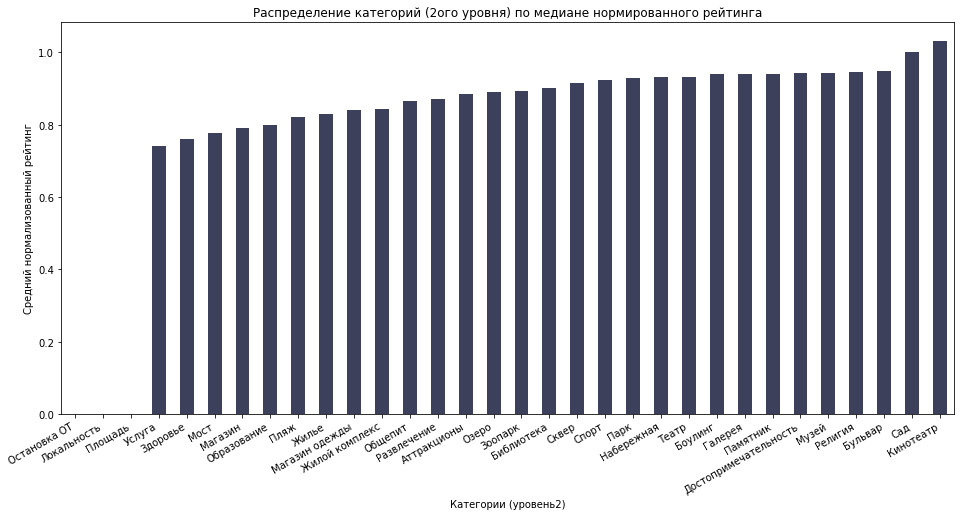

In [10]:
places_df.groupby('category_2').median()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий (2ого уровня) по медиане нормированного рейтинга')

Можно говорить о том, что в категории Парк большинство мест не находятся в топе, однако есть место - выброс, которое имеет высокий показатель рейтинга

Text(0.5, 1.0, 'Распределение категорий по среднему нормированному рейтингу')

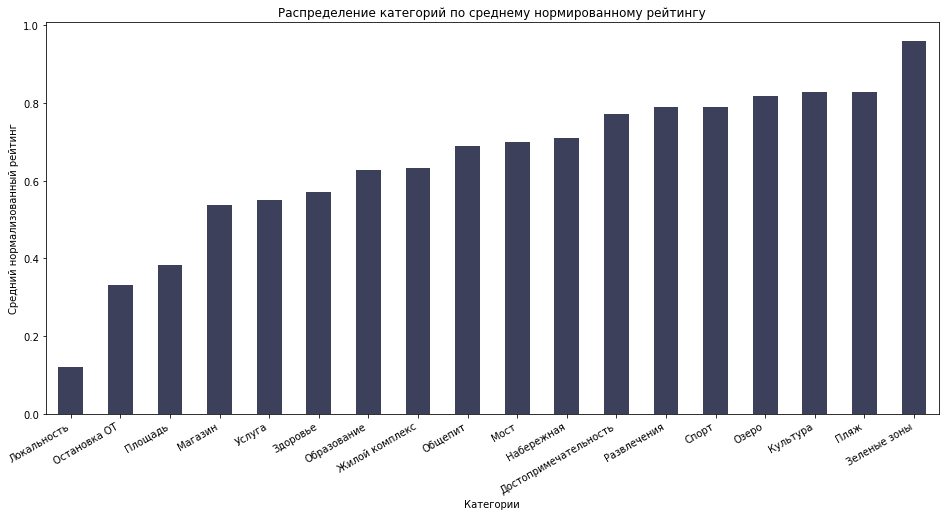

In [11]:
places_df.groupby('category').mean()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему нормированному рейтингу')

Text(0.5, 1.0, 'Распределение категорий по медиане нормированного рейтинга')

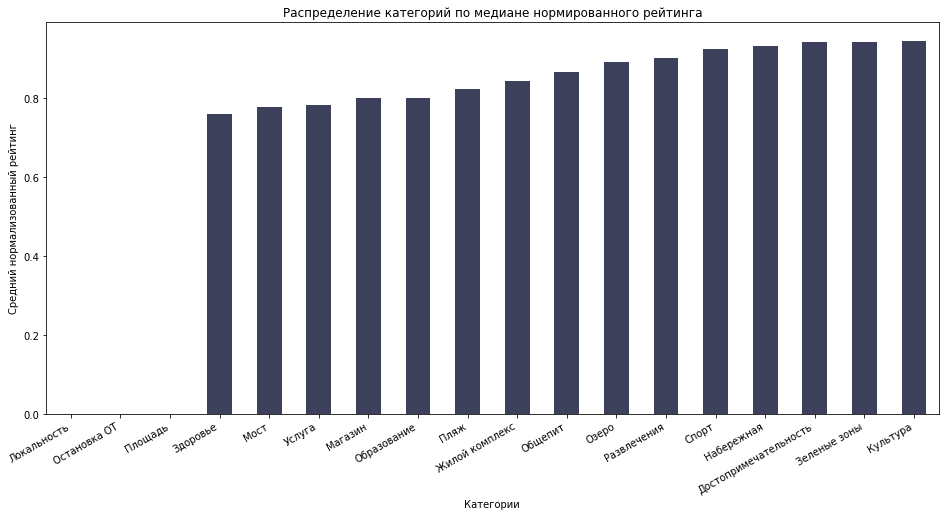

In [13]:
places_df.groupby('category').median()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане нормированного рейтинга')

Остановки, локальности и площади зачастую не имеют никаких оценок. Большей популярностью обладает категория Культура за счет кинотеатров, религии и музеев. Не отстают и зеленые зоны. Для зеленых зон большую популярность имеют сады и бульвары. Пользователи большую активность проявляют для мест-аттракторов и меньшую для обыденных: здоровье, услуга, магазин. Почти по всем показателям медианы выше средних значений, это значит, что преобладают места с показателем рейтинга выше среднего.

# Распределение категорий по количеству фотографий

Text(0.5, 1.0, 'Распределение категорий (2ого уровня) по среднему числу количества фото GP')

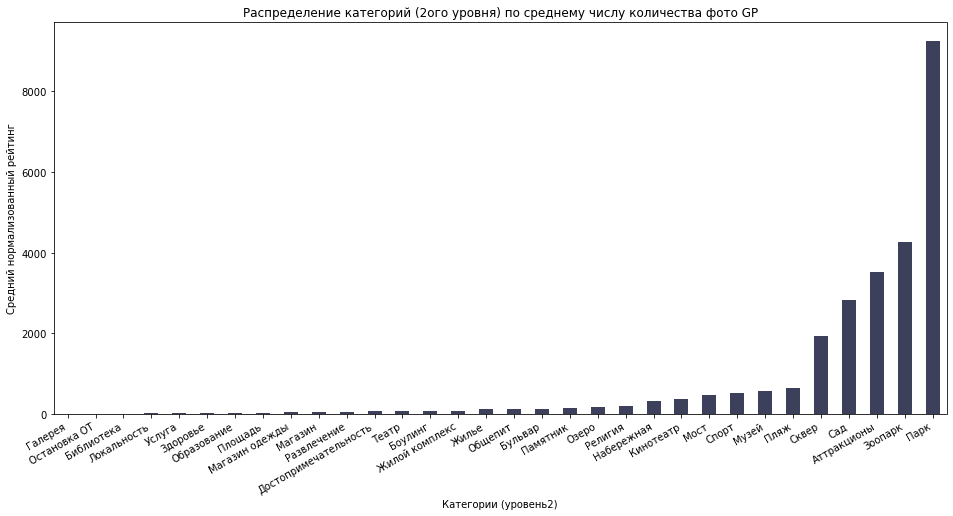

In [16]:
places_df.groupby('category_2').mean()['count_photo'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий (2ого уровня) по среднему числу количества фото GP')

Text(0.5, 1.0, 'Распределение категорий (2ого уровня) по медиане количества фото GP')

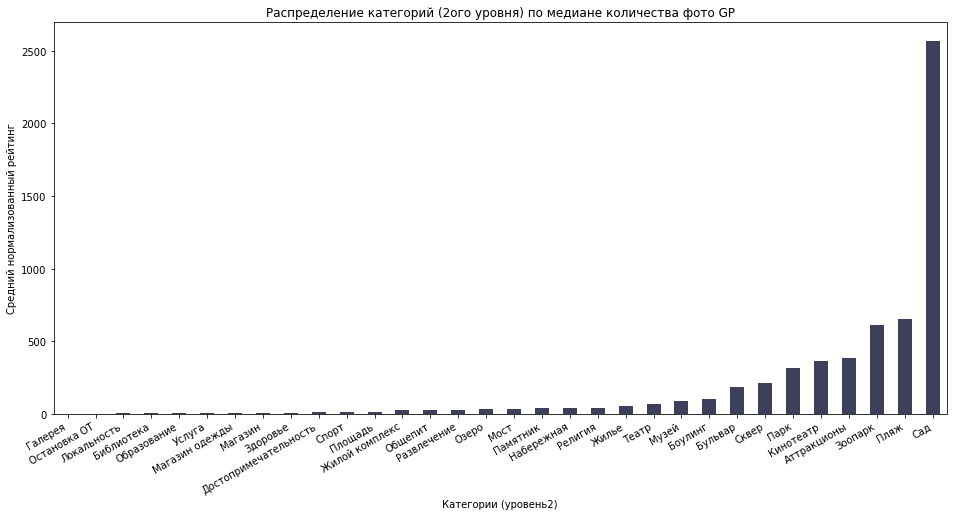

In [17]:
places_df.groupby('category_2').median()['count_photo'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий (2ого уровня) по медиане количества фото GP')

Категории Парк, зоопарк и аттракционы имеют единичные места с большим числов фотографий. В основном же, в других местах фотографии также публикуются, но не в таких больших количествах. Особенно отличительна категория сады, которым пользователи выкладывают фотографии в большом количестве.

Text(0.5, 1.0, 'Распределение категорий по среднему числу фотографий GP')

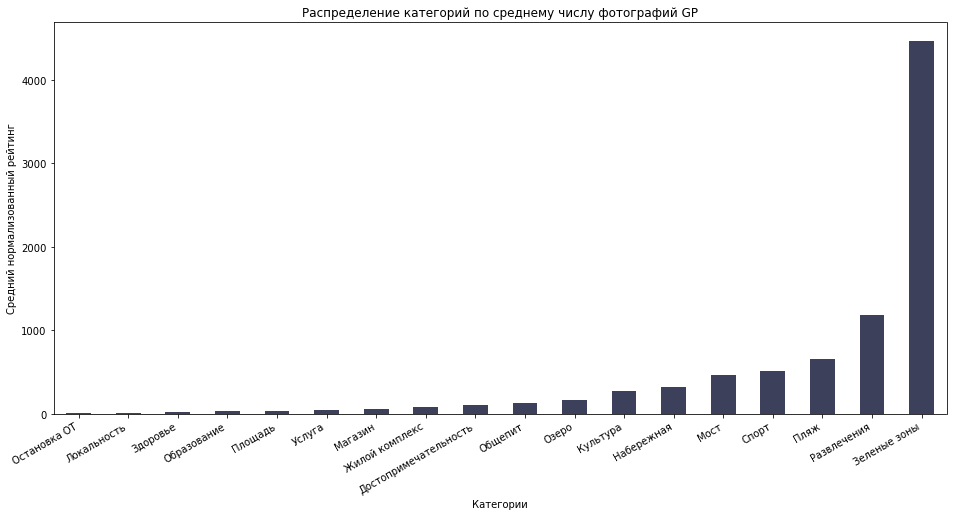

In [18]:
places_df.groupby('category').mean()['count_photo'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему числу фотографий GP')

В основном пользователи предпочитают публиковать фото из открытых пространств: зеленых зон, зоопарков, развлекательных парков, пляжей. Не смотря на то, что категория мост по рейтингу имеет не высокие показатели, по числу фотографий, можно сказать, что пользователи интересуются этой категорией. А значит, юзеры обычно фотографируют мост, а не пишут о них отзывы или возможно ставят низкие оценки.

Text(0.5, 1.0, 'Распределение категорий по медиане числа фотографий GP')

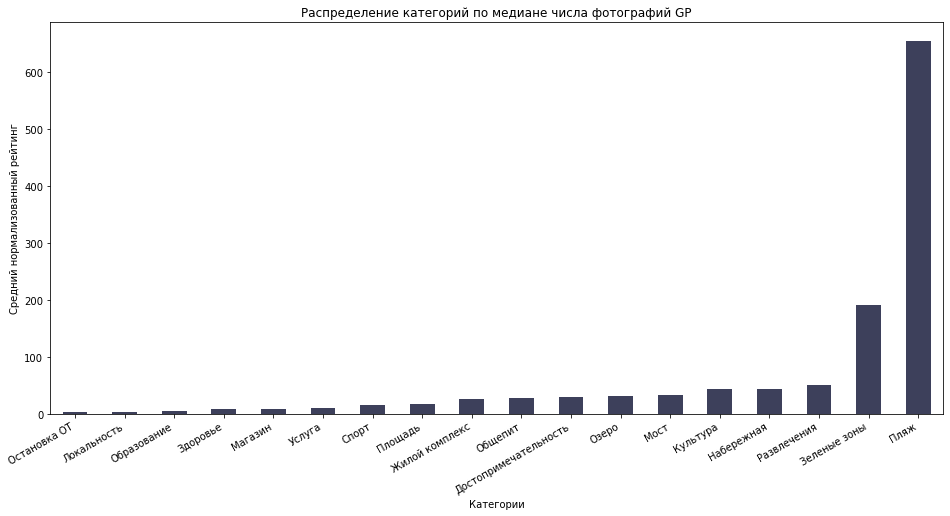

In [21]:
places_df.groupby('category').median()['count_photo'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане числа фотографий GP')

По прежнему можем говорить о том, что пользователи выкладывают фотографии с открытых зонах, в большей степени природных.

# Распределение категорий по количеству отзывов

Text(0.5, 1.0, 'Распределение категорий (2ого уровня) по среднему числу отзывов GP')

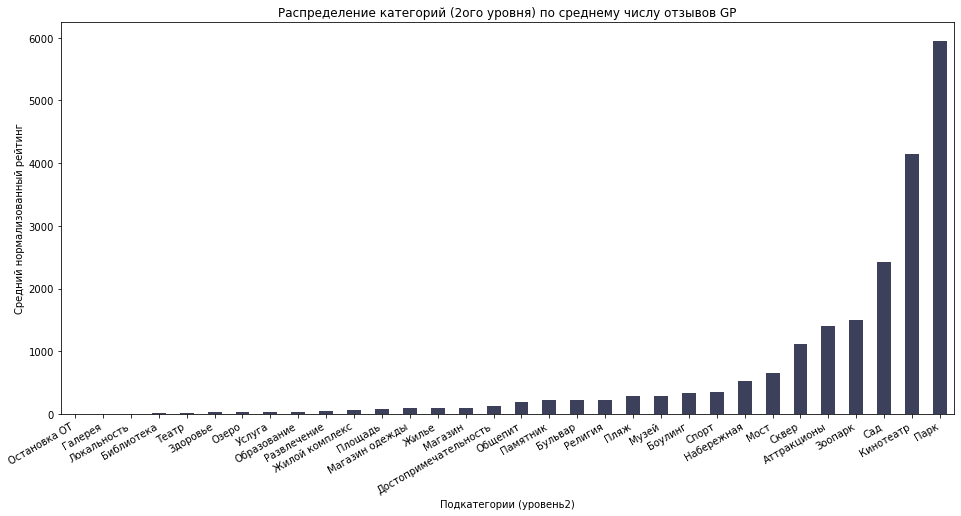

In [40]:
places_df.groupby('category_2').mean()['count_review'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Подкатегории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий (2ого уровня) по среднему числу отзывов GP')

Text(0.5, 1.0, 'Распределение категорий (2ого уровня) по медиане количества отзывов GP')

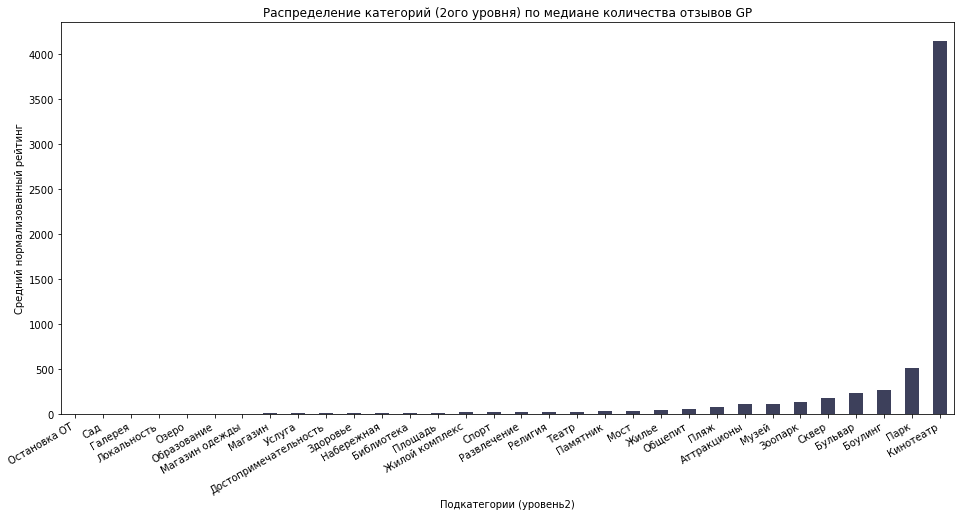

In [41]:
places_df.groupby('category_2').median()['count_review'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Подкатегории (уровень2)')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий (2ого уровня) по медиане количества отзывов GP')

Как и ожидалось, местам категории сад оставляются больше фотографий, а не отзывов. Скорее всего есть место-выброс, единичное место, которым пользователи оставили большое число комментариев, но в основном, их почти не оставляют.

Большой отрыв по медиане числа отзывов у кинотеатра. Возможно, данная категория перестанет лидировать, после проверки полноты сбора мест по ней.

Text(0.5, 1.0, 'Распределение категорий по среднему числу отзывов GP')

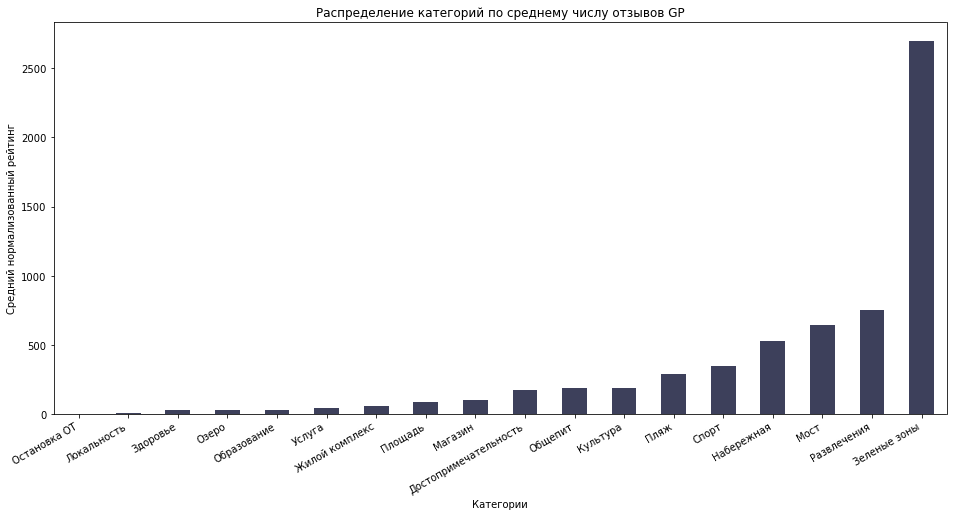

In [24]:
places_df.groupby('category').mean()['count_review'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему числу отзывов GP')

Text(0.5, 1.0, 'Распределение категорий по медиане числа отзывов GP')

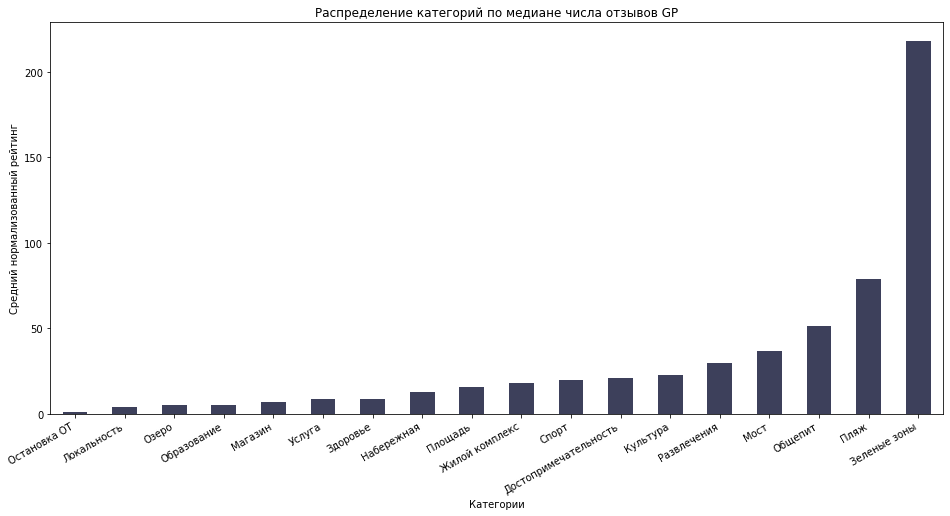

In [25]:
places_df.groupby('category').median()['count_review'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане числа отзывов GP')

За счет подкатегории парки - зеленые зоны лидируют в рейтинге по числу отзывов. Для категории общепит, характерны отзывы, а не фотографии. Возможно это чекины. Требуется дополнительный сбор отзывов, чтобы это понять.

# Сравнение распределений категорий по числу отзывов и фото

Text(0.5, 1.0, 'Распределение категорий по медиане числа отзывов и фотографий GP')

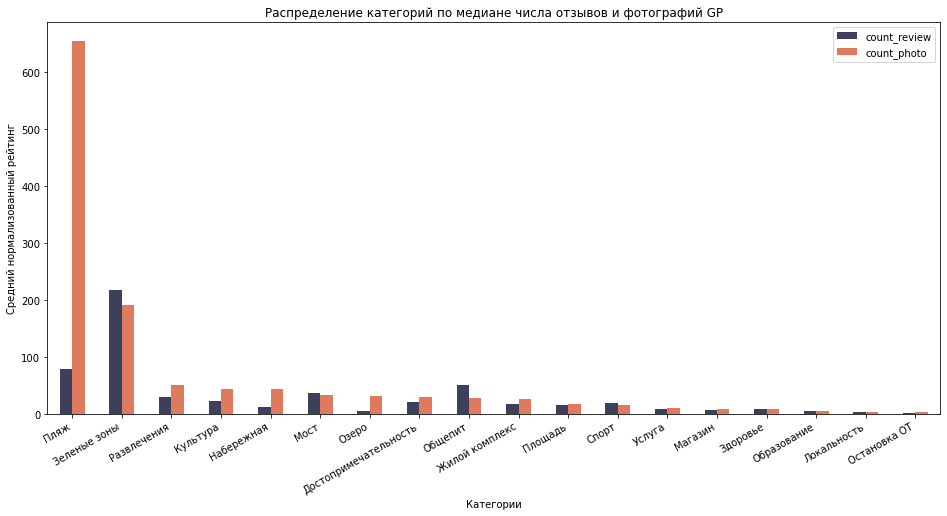

In [35]:
places_df.groupby('category').median()[['count_review', 'count_photo']].sort_values('count_photo', ascending = False)\
    .plot.bar(color =["#3D405B", "#E07A5F"],figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане числа отзывов и фотографий GP')

Text(0.5, 1.0, 'Распределение категорий по среднему числу отзывов и фотографий GP')

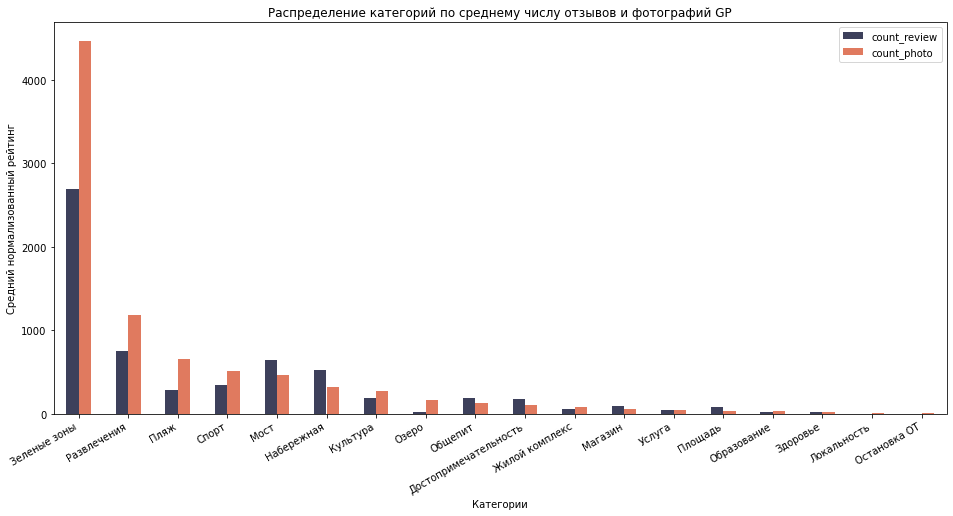

In [34]:
places_df.groupby('category').mean()[['count_review', 'count_photo']].sort_values('count_photo', ascending = False)\
    .plot.bar(color =["#3D405B", "#E07A5F"],figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему числу отзывов и фотографий GP')

Text(0.5, 1.0, 'Распределение категорий по медиане числа отзывов и фотографий GP')

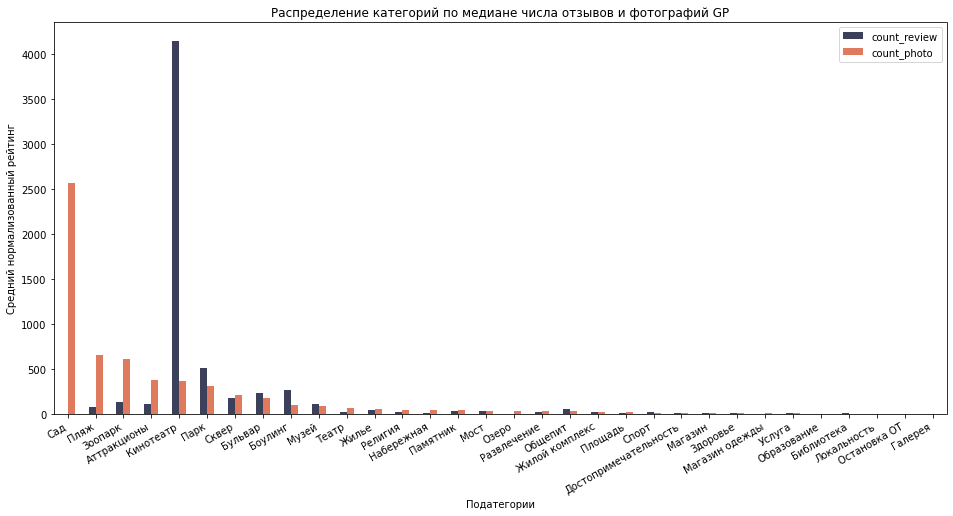

In [38]:
places_df.groupby('category_2').median()[['count_review', 'count_photo']].sort_values('count_photo', ascending = False)\
    .plot.bar(color =["#3D405B", "#E07A5F"],figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Податегории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане числа отзывов и фотографий GP')

Text(0.5, 1.0, 'Распределение категорий по среднему числу отзывов и фотографий GP')

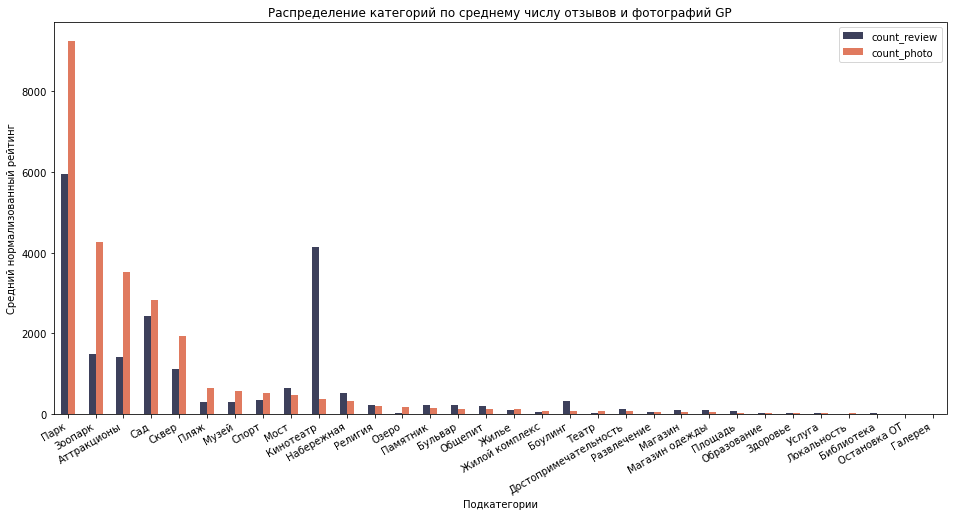

In [39]:
places_df.groupby('category_2').mean()[['count_review', 'count_photo']].sort_values('count_photo', ascending = False)\
    .plot.bar(color =["#3D405B", "#E07A5F"],figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Подкатегории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему числу отзывов и фотографий GP')

# Распределение мест по итоговому рейтингу и категориям

In [10]:
places_df.sort_values('normalized_rating', ascending = False)[:20].category.drop_duplicates()

1609     Зеленые зоны
1616            Спорт
15425         Магазин
2740      Развлечения
15233            Мост
Name: category, dtype: object

In [58]:
places_df['category'].fillna('', inplace = True)

In [80]:
places_df.groupby(['url_agg','title']).mean().reset_index().sort_values('normalized_rating', ascending = False).merge(places_df[['url_agg', 'category']], how = 'left', on = 'url_agg').set_index('title')[['category','normalized_rating']][:20]

,category,normalized_rating
title,,
Парк «Краснодар»,Зеленые зоны,2.980000
"Стадион ФК ""Краснодар""",Спорт,2.263249
Красная Площадь,Магазин,2.071676
Чистяковская Роща,Зеленые зоны,1.794292
"Городской сад, парк культуры и отдыха",Зеленые зоны,1.523233
"Городской сад, парк культуры и отдыха",Зеленые зоны,1.523233
Парк культуры и отдыха имени 30-летия Победы,Зеленые зоны,1.457960
Солнечный остров,Развлечения,1.356455
Бауцентр,Магазин,1.307175


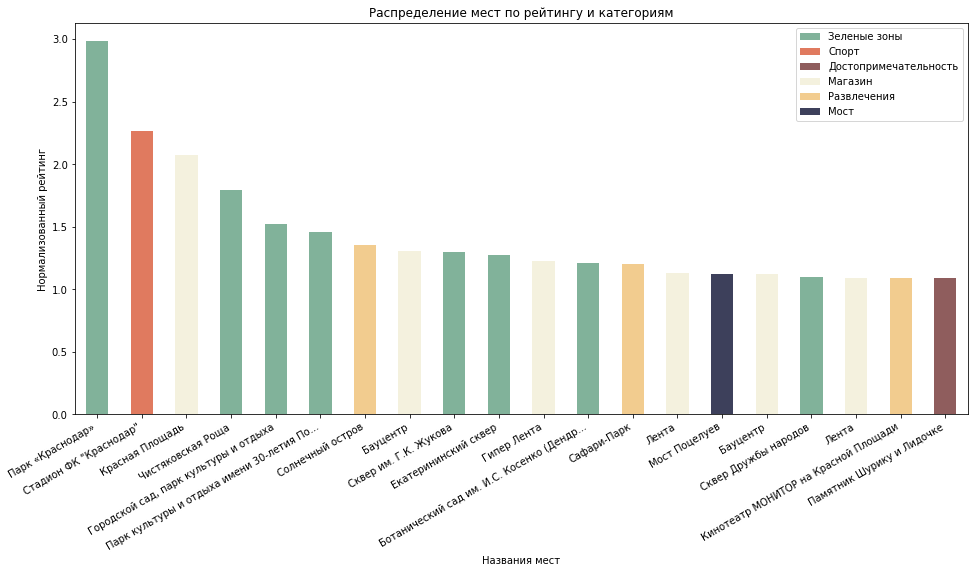

In [85]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Достопримечательность":"#8f5d5d", "Магазин": "#F4F1DE", "Развлечения":"#F2CC8F", 'Мост':'#3D405B'}
plot_df = places_df.groupby(['url_agg','title']).mean().reset_index().sort_values('normalized_rating', ascending = False).merge(places_df[['url_agg', 'category']], how = 'left', on = 'url_agg').drop_duplicates()
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df = plot_df.set_index('title').sort_values('normalized_rating', ascending = False)[['category','normalized_rating']][:20]
plot_df['normalized_rating'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')
plt.title('Распределение мест по рейтингу и категориям')
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

#  Распределение мест по пользовательскому рейтингу среди топ-20 мест популярных мест

In [71]:
places_df.sort_values('normalized_rating', ascending = False)[:20].sort_values('rating', ascending = False).category.drop_duplicates()

1609     Зеленые зоны
1616            Спорт
15425         Магазин
15460     Развлечения
15233            Мост
Name: category, dtype: object

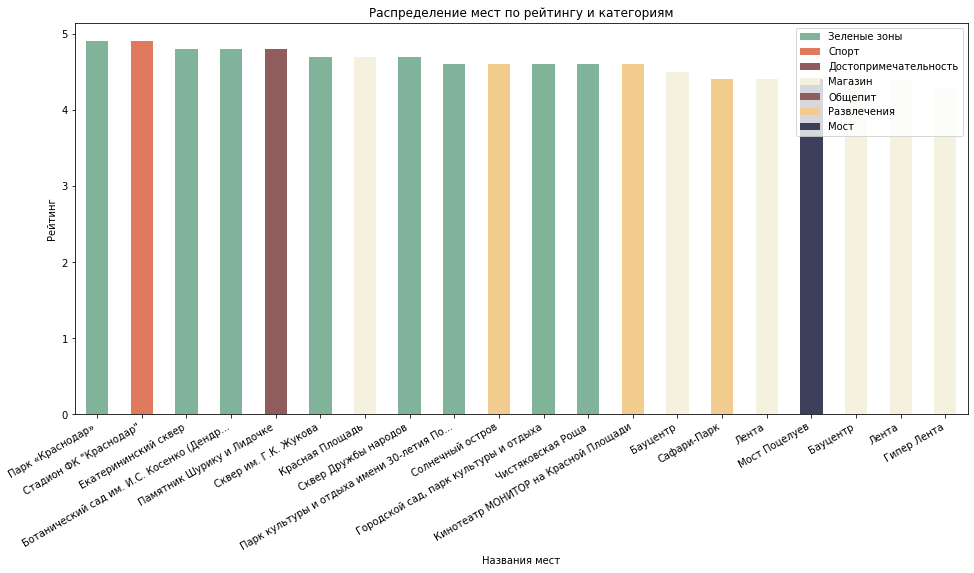

In [88]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Достопримечательность":"#8f5d5d", "Магазин": "#F4F1DE", "Общепит":"#8f5d5d","Развлечения":"#F2CC8F", 'Мост':'#3D405B'}
plot_df = places_df.drop_duplicates(['title', 'category', 'normalized_rating']).sort_values('normalized_rating', ascending = False)[:20].sort_values('rating', ascending = False)
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)

plot_df.set_index('title')['rating'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))

plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Рейтинг')
plt.title('Распределение мест по рейтингу и категориям')

legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

# Распределение мест по фотографиям и категориям

In [45]:
places_df.category.fillna('', inplace = True)
places_df.sort_values('count_photo', ascending = False)[:20].category.drop_duplicates()

1609     Зеленые зоны
1616            Спорт
15425         Магазин
2740      Развлечения
9924          Общепит
3536                 
15233            Мост
8044      Образование
Name: category, dtype: object

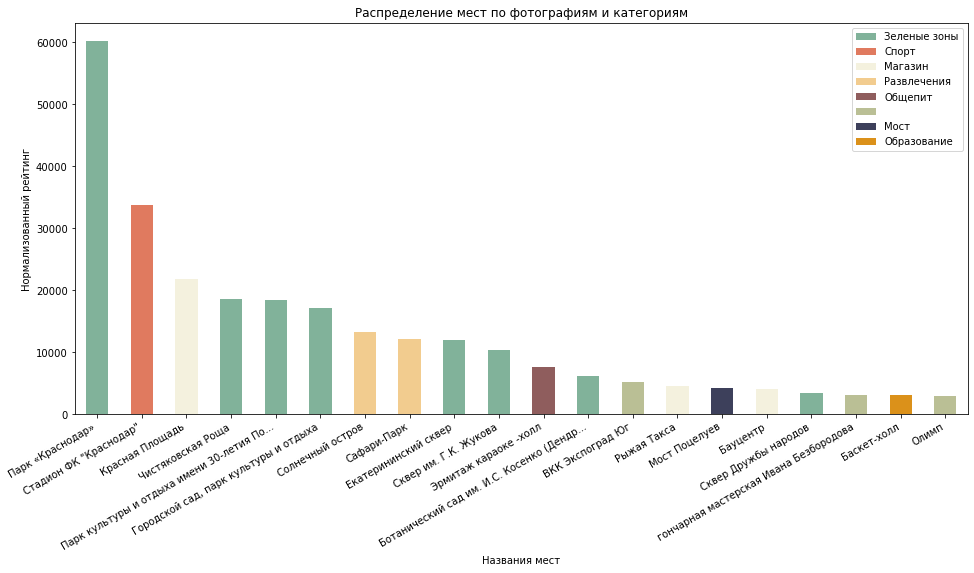

In [89]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Магазин": "#F4F1DE", "Развлечения":"#F2CC8F", "Общепит":"#8f5d5d", "":"#babf95",'Мост':'#3D405B', "Образование":"#DB911A"}
plot_df = places_df.drop_duplicates(['title', 'category', 'normalized_rating']).sort_values('count_photo', ascending = False)[:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df.set_index('title')['count_photo'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')
plt.title("Распределение мест по фотографиям и категориям")
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

# Распределение мест по отзывам и категориям

In [62]:
places_df.category.fillna('', inplace = True)
places_df.sort_values('count_review', ascending = False)[:20].category.drop_duplicates()

1609     Зеленые зоны
15425         Магазин
1616            Спорт
2740      Развлечения
15233            Мост
Name: category, dtype: object

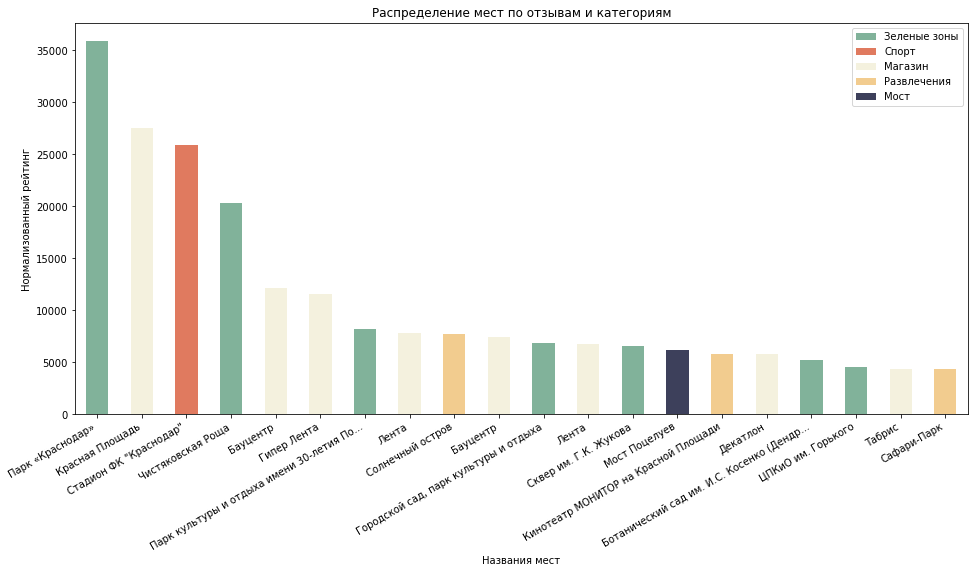

In [69]:
dict_colors = {'Зеленые зоны': "#81B29A", "Спорт": "#E07A5F", "Магазин": "#F4F1DE", "Развлечения":"#F2CC8F",'Мост':'#3D405B',}
plot_df = places_df.sort_values('count_review', ascending = False)[:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df.set_index('title')['count_review'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')
plt.title("Распределение мест по отзывам и категориям")
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

# Определение мест c максимальным рейтингом пользоваталей среди самых комментируемых мест

In [56]:
places_df.category.fillna('', inplace = True)
places_df.sort_values('count_review', ascending = False).loc[places_df.rating == 5][:20].category.drop_duplicates()

2155                    Услуга
7509                          
9951                   Магазин
7112                  Здоровье
1126                     Спорт
15199    Достопримечательность
Name: category, dtype: object

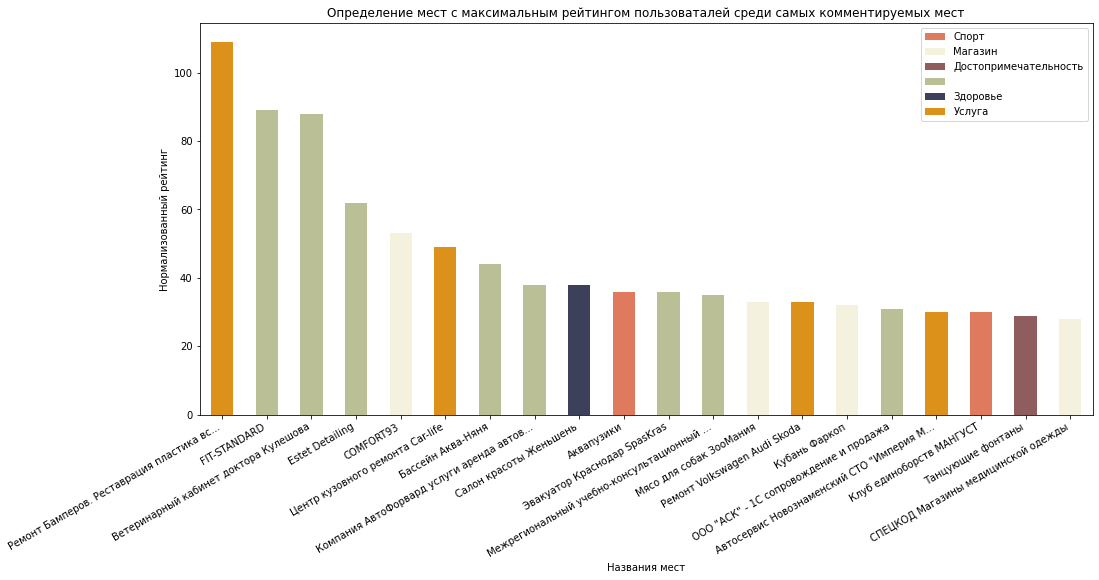

In [70]:
dict_colors = {"Спорт": "#E07A5F", "Магазин": "#F4F1DE", "Достопримечательность":"#8f5d5d", "":"#babf95",'Здоровье':'#3D405B', "Услуга":"#DB911A"}
plot_df = places_df.sort_values('count_review', ascending = False).loc[places_df.rating == 5][:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df.set_index('title')['count_review'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')
plt.title("Определение мест c максимальным рейтингом пользоваталей среди самых комментируемых мест")
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

# Популярность мест по категориям

In [97]:
places_df.drop_duplicates(['title', 'category', 'rating_by_category'])

,url,title,address,type,popular_times_bars,geometry,types,category_2,category,url_agg,count_review,count_photo,rating,rating_by_category,normalized_rating
0,https://www.google.com/maps/place/?q=place_id:...,"Новый век, СФ","ул. Демуса, 60, Краснодар, Краснодарский край,...",Строительная компания,NaN,POINT (39.09852739999999 45.0494082),"['general_contractor', 'point_of_interest', 'e...",NaN,,https://www.google.com/maps/place/?q=place_id:...,2.0,3.0,5.0,0.000000,1.000106
1,https://www.google.com/maps/place/?q=place_id:...,Магазин автоприцепов,"ул. Ростовское ш., 24/1, Краснодар, Краснодарс...",Продажа прицепов,NaN,POINT (38.9911055 45.08962769999999),"['point_of_interest', 'store', 'establishment']",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,2.0,6.0,4.5,0.900347,0.900156
2,https://www.google.com/maps/place/?q=place_id:...,Pepe магазин детской одежды,"Краснодар, Краснодарский край, 350901",Магазин одежды,NaN,POINT (39.0382925 45.0743813),"['point_of_interest', 'establishment']",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,0.0,0.0,NaN,0.000000,0.000000
3,https://www.google.com/maps/place/?q=place_id:...,Трейд Инвест,"ул. Тихорецкая, 8, Краснодар, Краснодарский кр...",Оптовая продажа строительных материалов,NaN,POINT (39.0377053 45.0395949),"['general_contractor', 'point_of_interest', 'e...",NaN,,https://www.google.com/maps/place/?q=place_id:...,0.0,0.0,NaN,0.000000,0.000000
4,https://www.google.com/maps/place/?q=place_id:...,Первый Риэлт Центр,"Краснодар, Краснодарский край, 350000",Агентство недвижимости,NaN,POINT (38.972604 45.035117),"['real_estate_agency', 'point_of_interest', 'e...",Услуга,Услуга,https://www.google.com/maps/place/?q=place_id:...,0.0,0.0,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15520,https://www.google.com/maps/place/?q=place_id:...,Мадьяр-Гриль,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Ресторан,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9831636 45.1007007),"['restaurant', 'bar', 'food', 'point_of_intere...",Общепит,Общепит,https://www.google.com/maps/place/?q=place_id:...,170.0,32.0,4.6,0.976035,0.925277
15521,https://www.google.com/maps/place/?q=place_id:...,DNS,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Магазин электроники,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.983847 45.10220899999999),"['electronics_store', 'home_goods_store', 'poi...",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,71.0,19.0,4.1,0.823450,0.822298
15522,https://www.google.com/maps/place/?q=place_id:...,"Ригла, ООО, сеть аптек","ул. Кубанская набережная, 25А, Краснодар, Крас...",Аптека,"['Загруженность в 04:00: 0%.', 'Загруженность ...",POINT (38.9594357 45.0219355),"['pharmacy', 'health', 'point_of_interest', 's...",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,9.0,4.0,2.3,0.460510,0.460318
15523,https://www.google.com/maps/place/?q=place_id:...,"Патрик & Мари, Сеть кулинарий","ул. Кубанская набережная, 35, Краснодар, Красн...",Кафе-кондитерская,"['Загруженность в 04:00: 0%.', 'Загруженность ...",POINT (38.9594648 45.0246223),"['meal_delivery', 'bakery', 'food', 'point_of_...",Общепит,Общепит,https://www.google.com/maps/place/?q=place_id:...,225.0,188.0,4.5,0.993235,0.909406


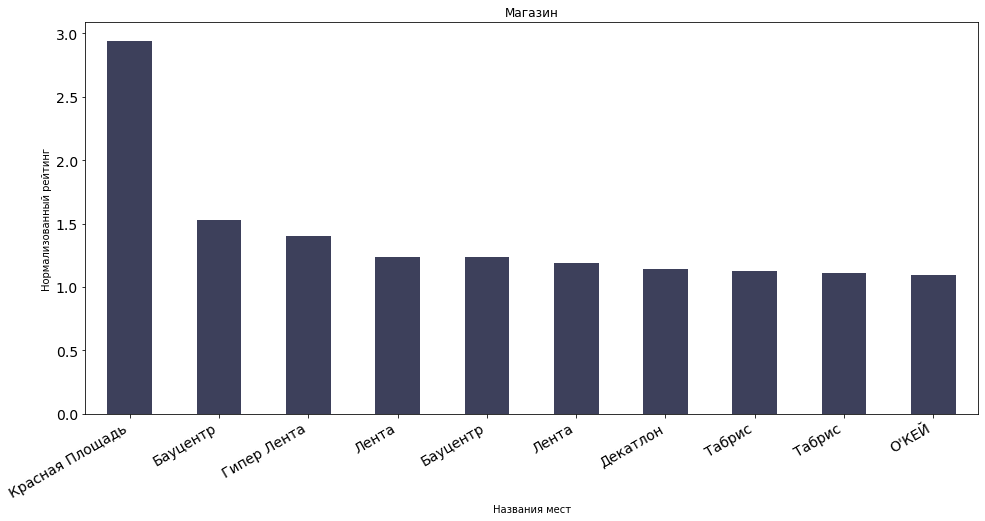

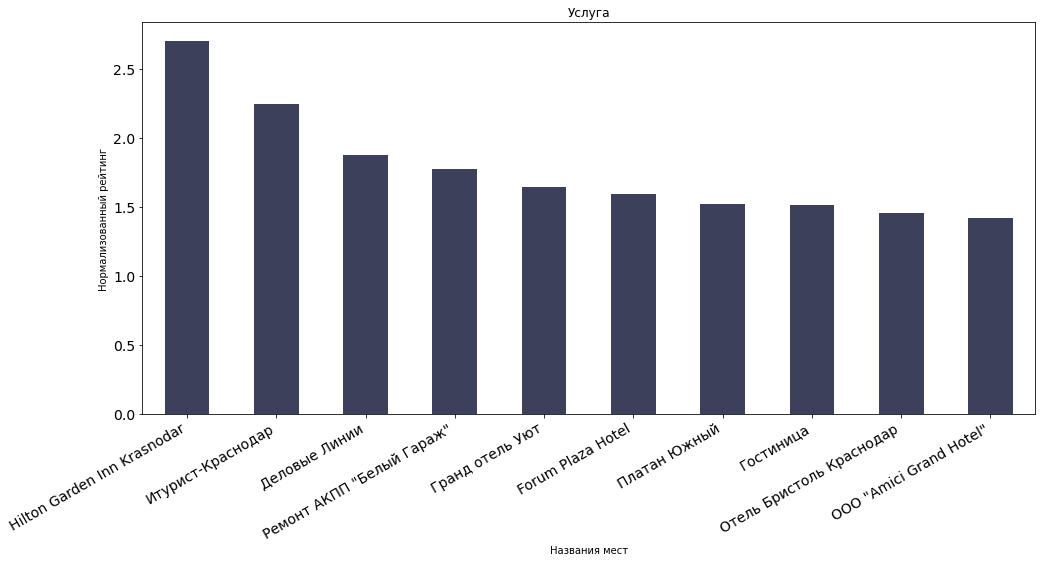

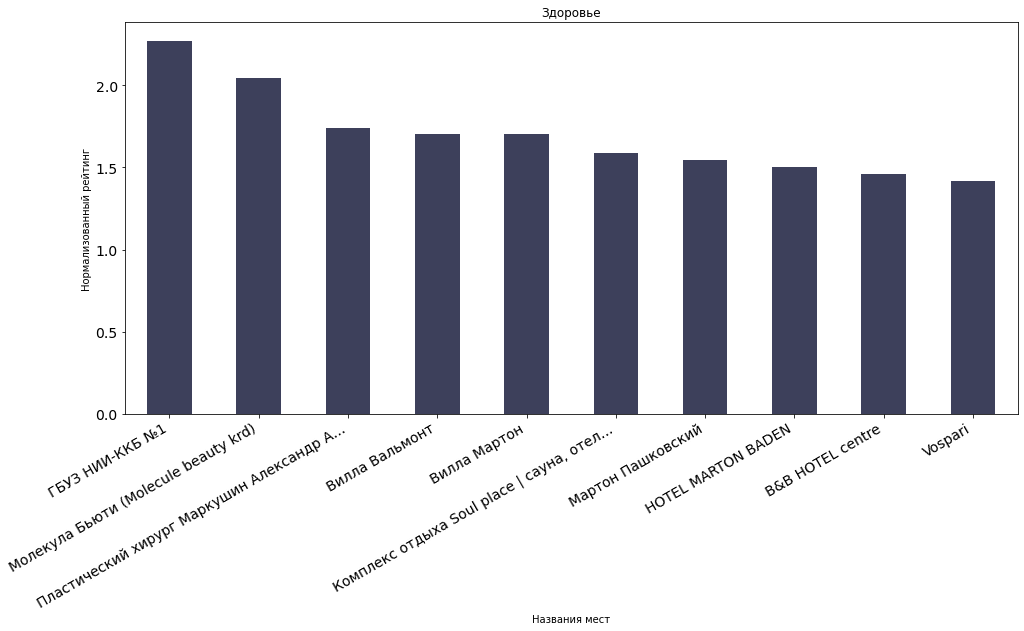

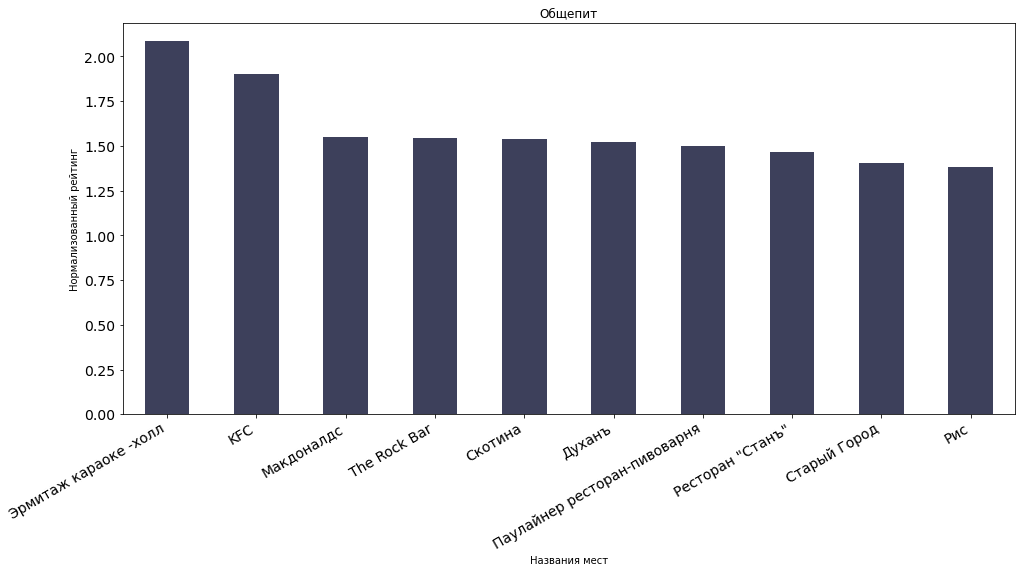

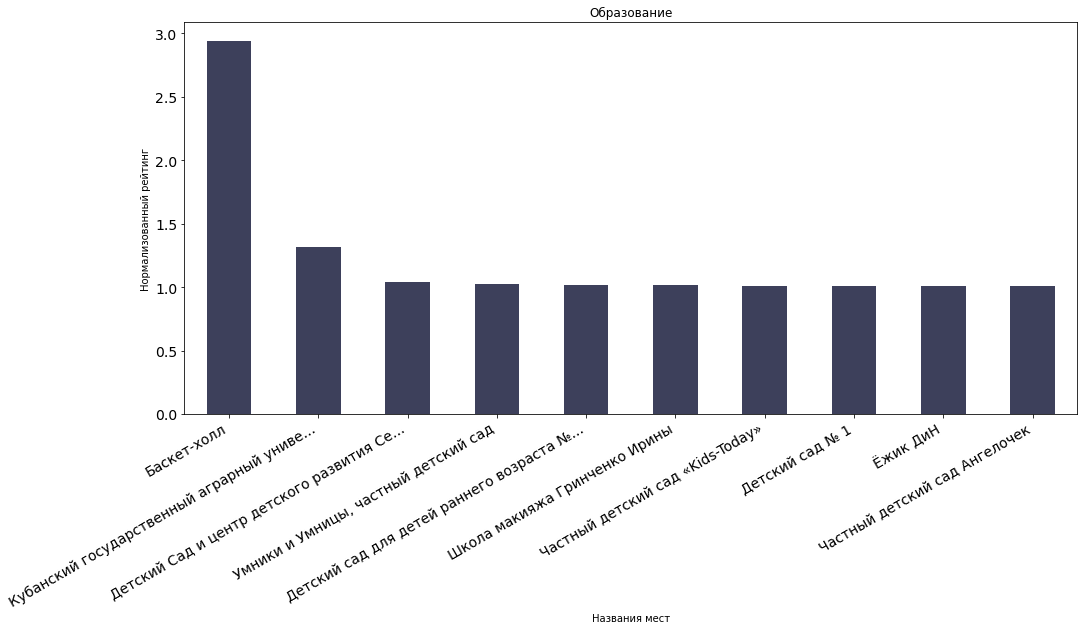

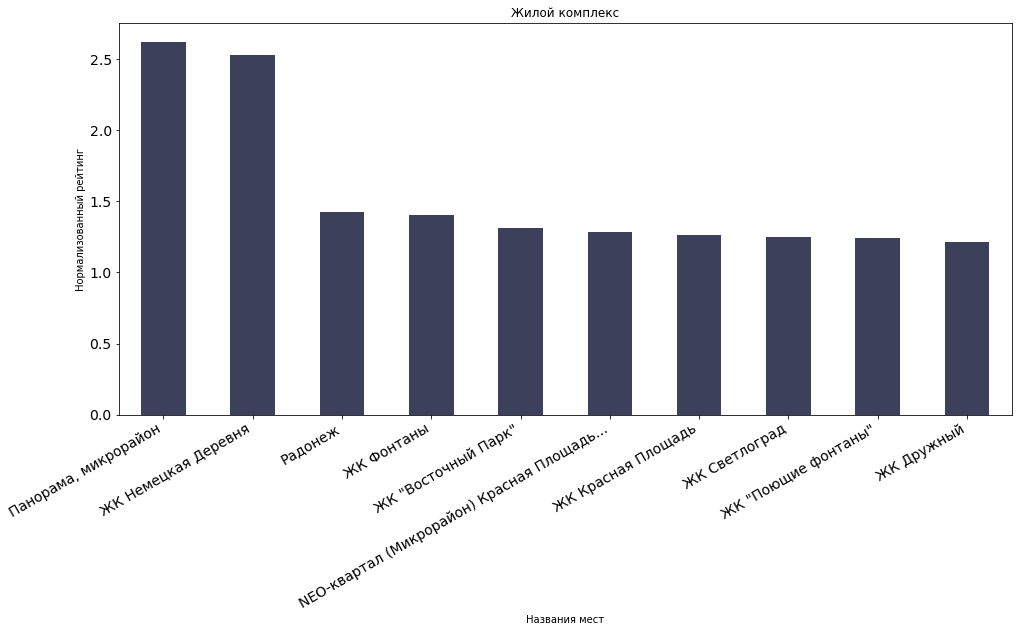

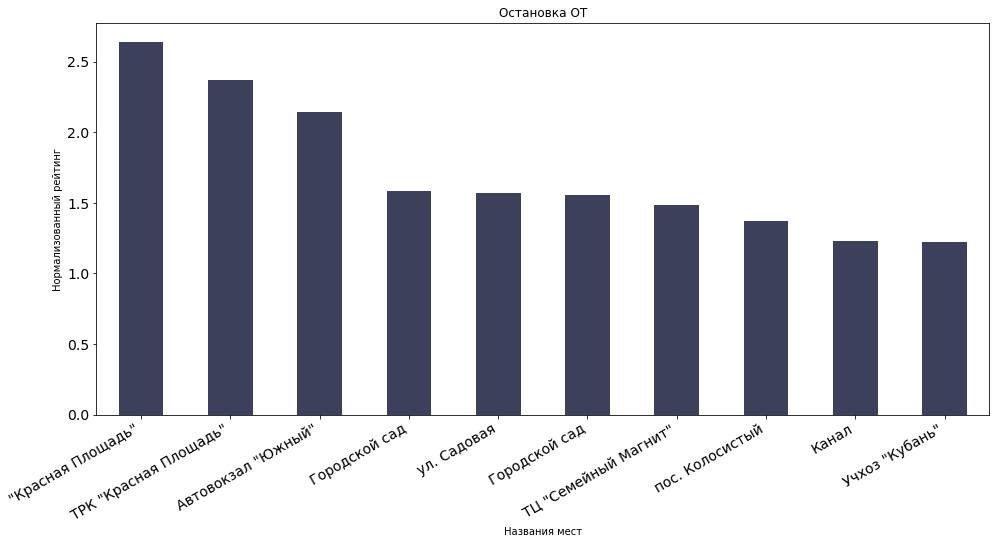

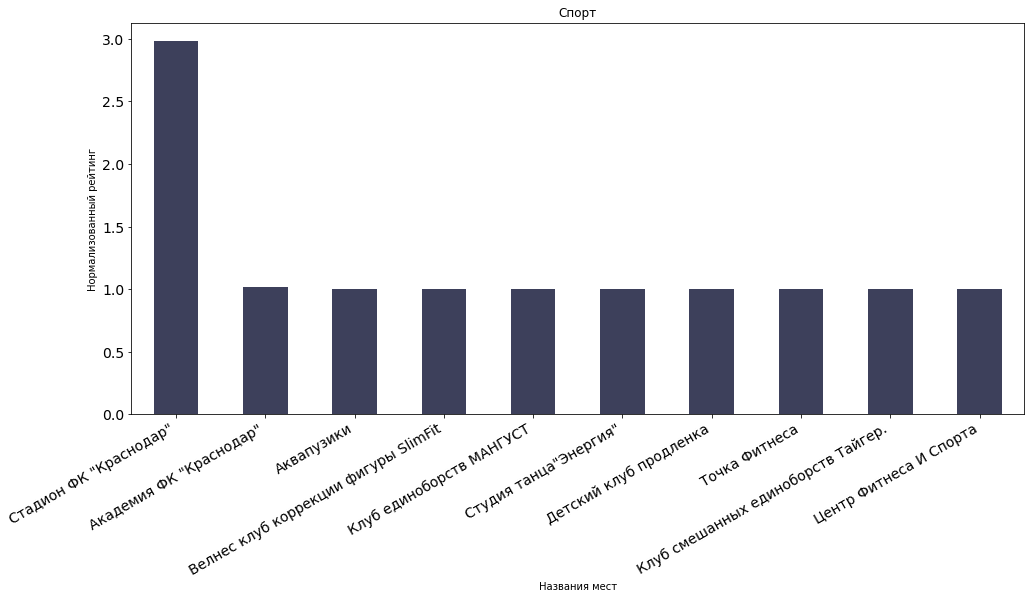

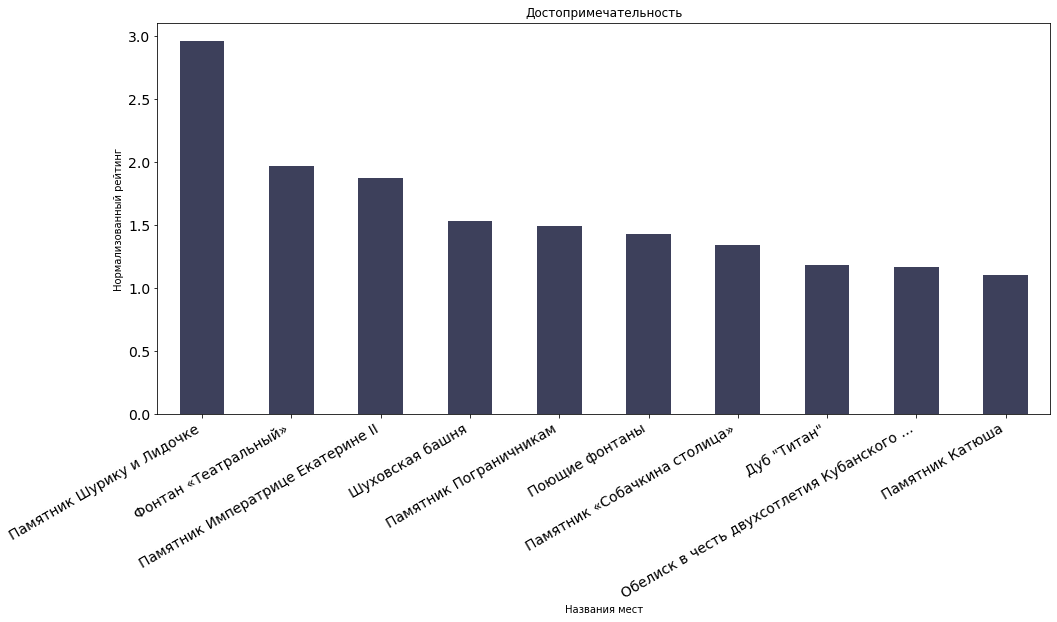

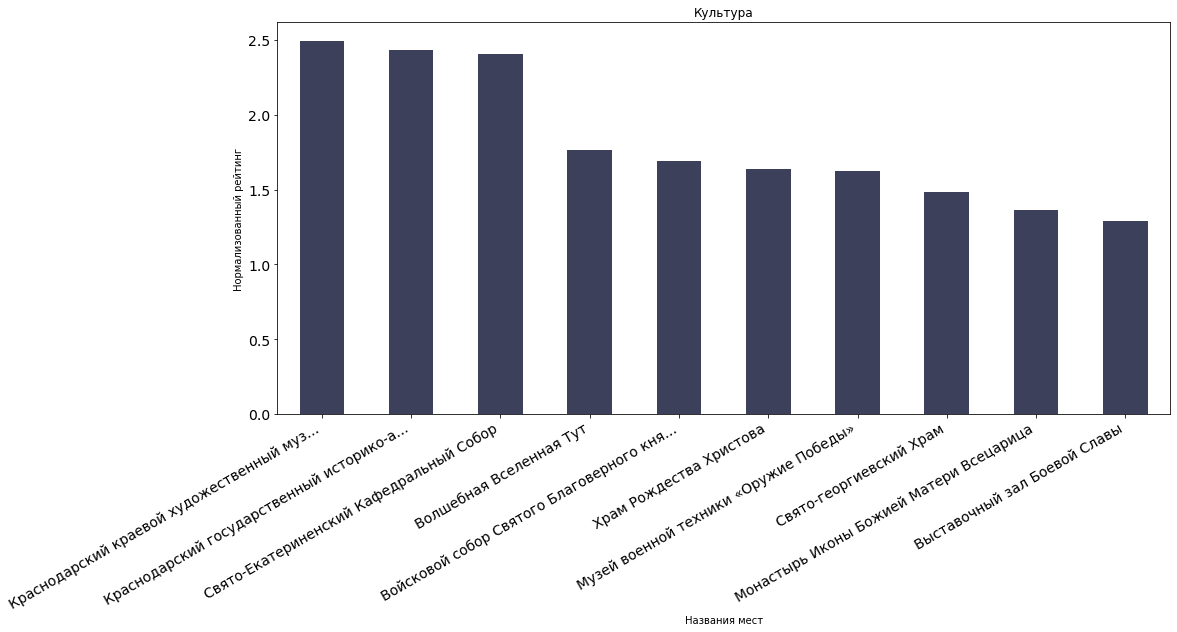

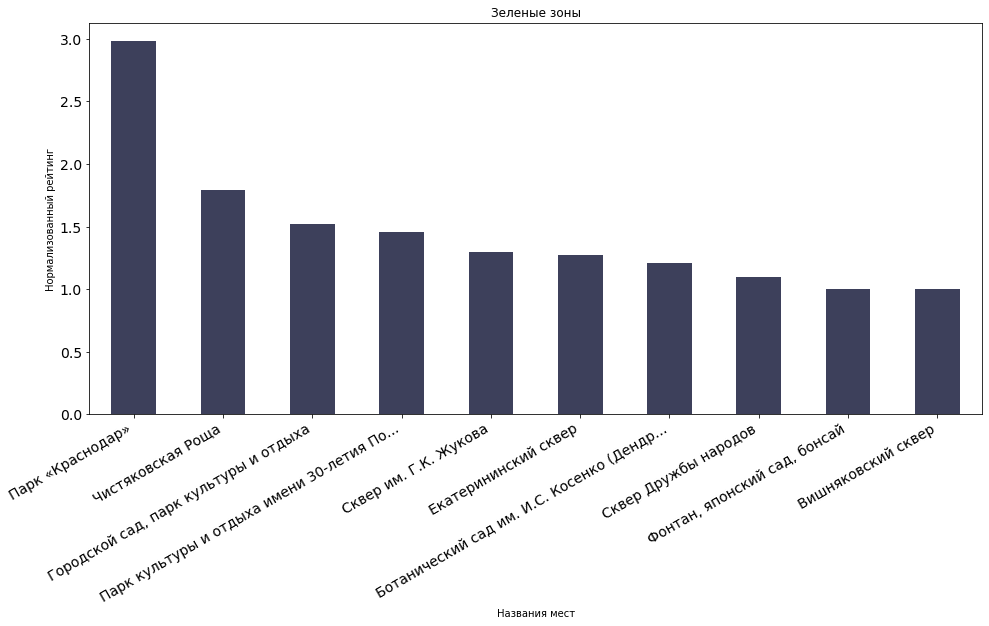

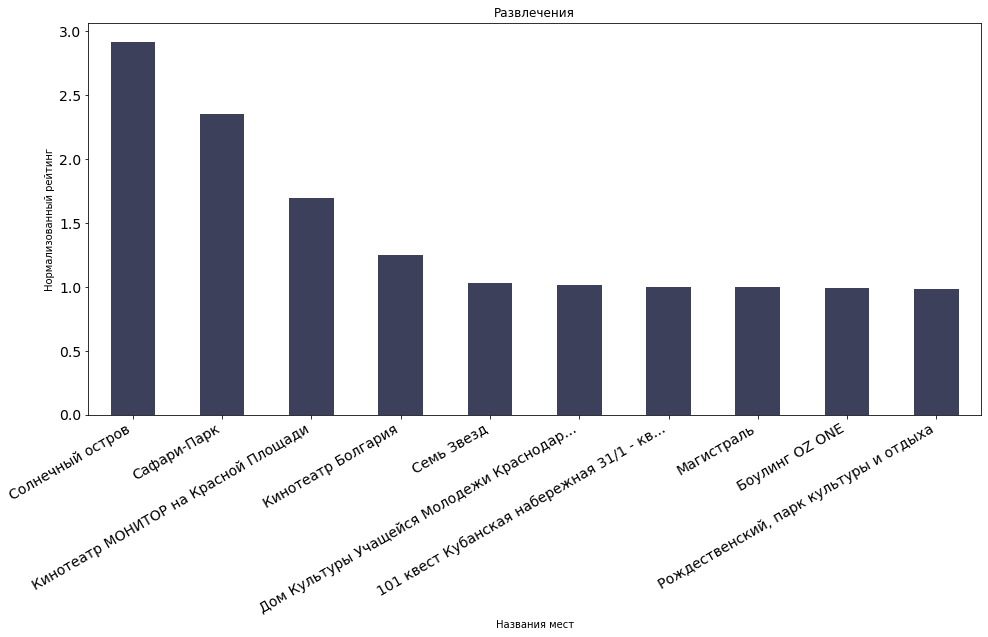

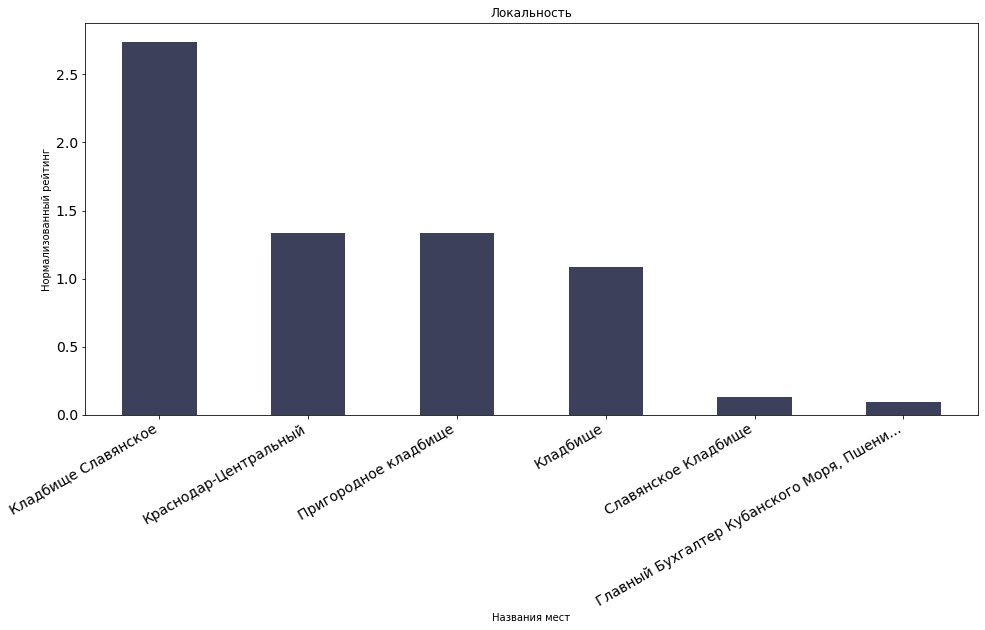

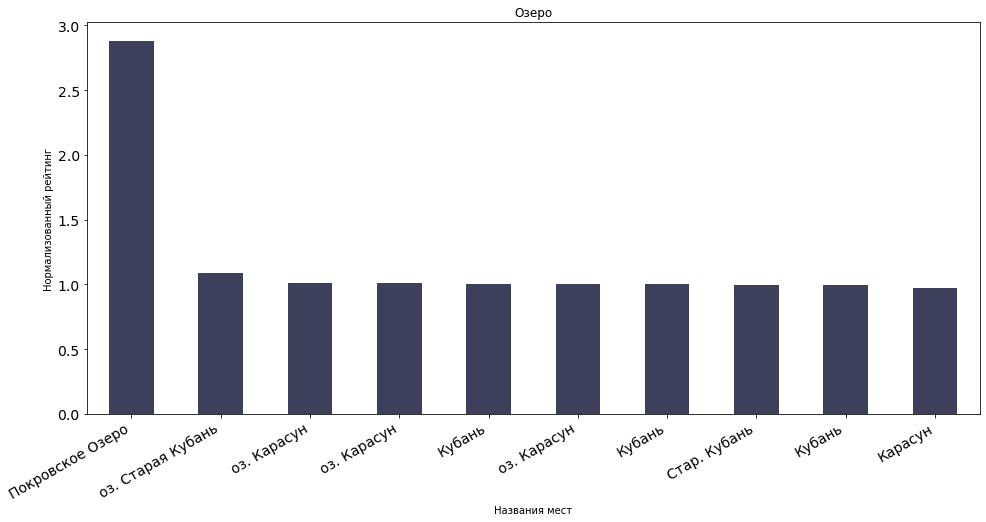

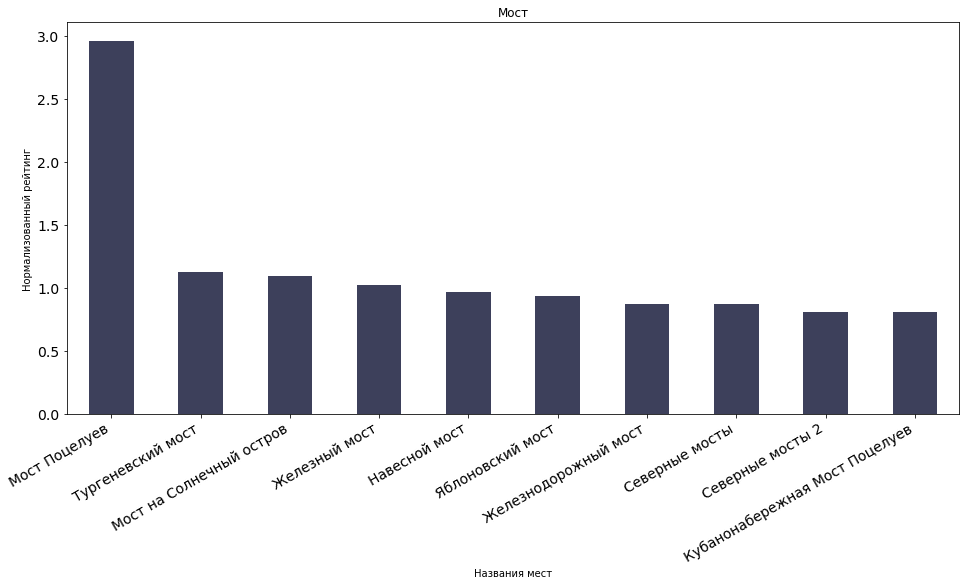

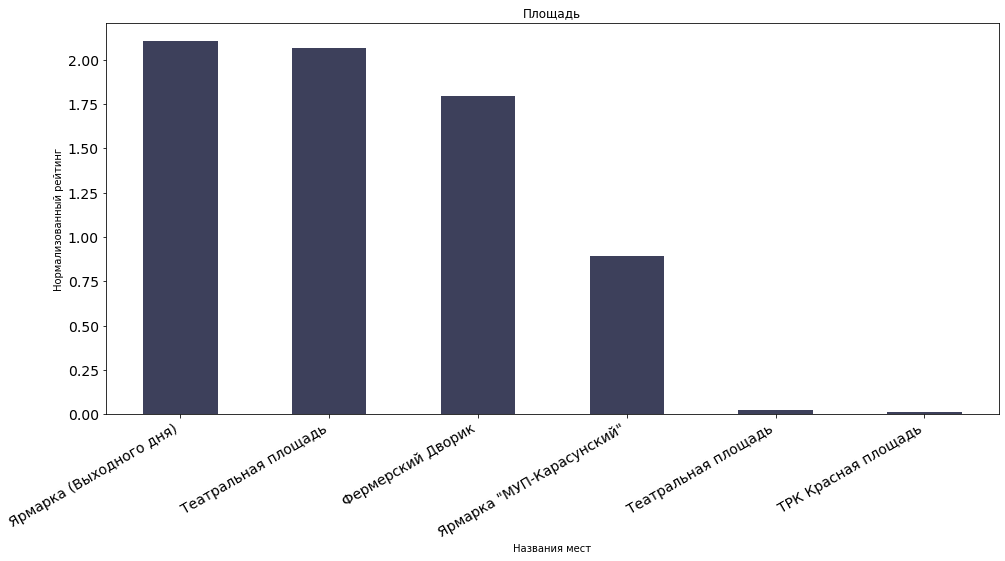

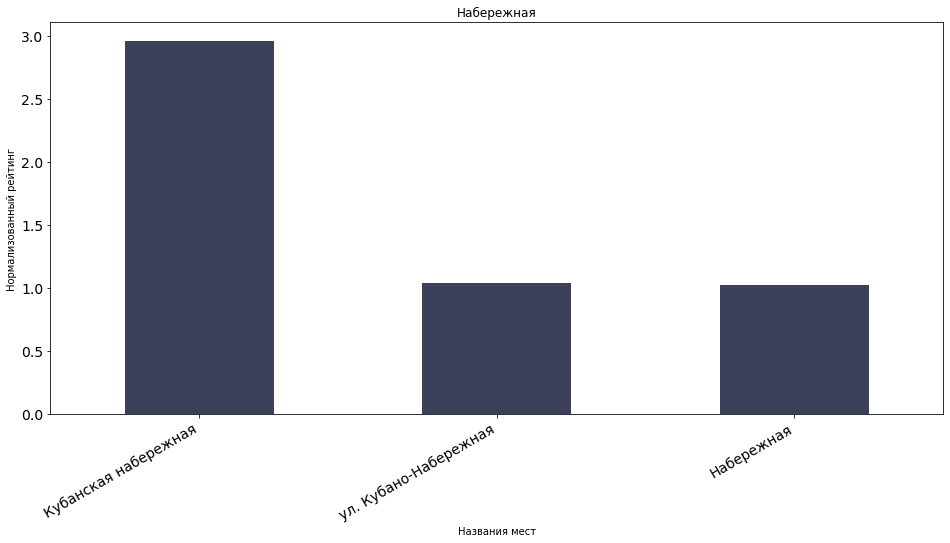

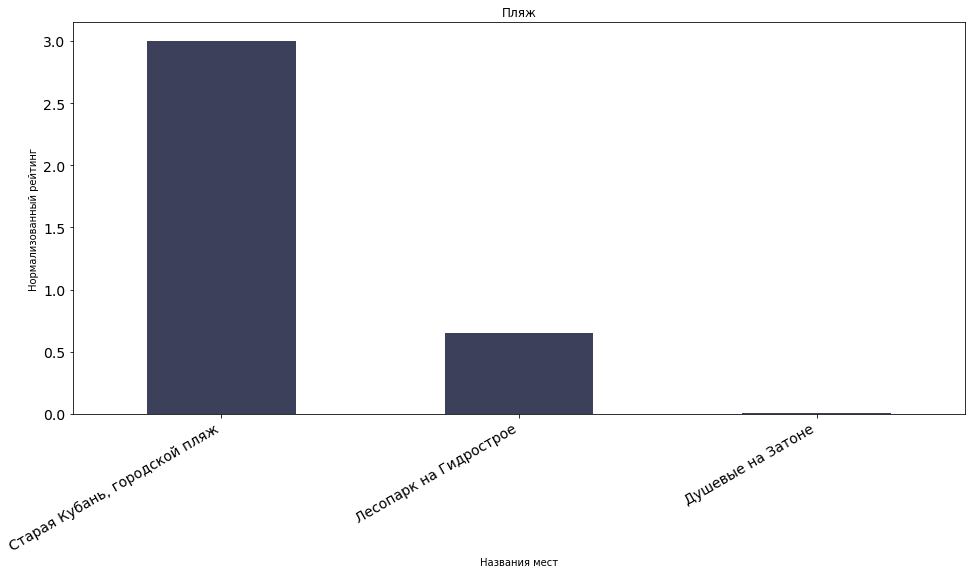

In [99]:
list_top=[]
for i in places_df.drop_duplicates(['title', 'category', 'rating_by_category']).loc[places_df.category!=''].category.value_counts().keys():
    plot_df = places_df.drop_duplicates(['title', 'category', 'rating_by_category']).loc[(places_df.category==i)&(places_df.rating_by_category!=0)].sort_values('rating_by_category', ascending = False)[:10]
    list_top.append(plot_df)
    plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
    
    plot_df.set_index('title')['rating_by_category'].plot.bar(color ="#3D405B" , figsize = (16, 8), fontsize=14)
    plt.title(i)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Названия мест')
    plt.ylabel('Нормализованный рейтинг')
    plt.show()

# Определение улиц с большим числом категории еда

In [54]:
places_df.category.fillna('', inplace = True)

In [58]:
places_df.loc[places_df.category.str.contains('Общепит')]

,url,title,address,type,popular_times_bars,geometry,types,rating,count_review,count_photo,category_2,category,normalized_rating,rating_by_category
65,https://www.google.com/maps/place/?q=place_id:...,Шашлычный двор,"ул. Тюляева, 43, Краснодар, Краснодарский край...",Ресторан,NaN,POINT (39.0960469 45.0396082),"['restaurant', 'food', 'point_of_interest', 'e...",4.2,176.0,10.0,Общепит,Общепит,0.845078,0.894984
131,https://www.google.com/maps/place/?q=place_id:...,KFC,"ул. Александра Покрышкина, д. 3, Краснодар, Кр...",Фастфуд,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9497861 45.1079132),"['restaurant', 'food', 'point_of_interest', 'e...",2.3,27.0,3.0,Общепит,Общепит,0.460803,0.468627
167,https://www.google.com/maps/place/?q=place_id:...,Палитра Суши,"Кружевная, 5, Краснодар, Краснодарский край, 3...",Суши,NaN,POINT (39.06545699999999 44.99295389999999),"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,Общепит,Общепит,0.000000,0.000000
168,https://www.google.com/maps/place/?q=place_id:...,Flat White Flat,"Конгрессная, 23, Краснодар, Краснодарский край...",Кофейня,NaN,POINT (38.9624194 45.1072286),"['cafe', 'food', 'point_of_interest', 'store',...",4.5,2.0,NaN,Общепит,Общепит,0.900056,0.900610
198,https://www.google.com/maps/place/?q=place_id:...,RAI-SPA,NaN,NaN,"['Загруженность в 04:00: 87%.', 'Загруженность...",POINT (39.01081070000001 45.0110473),"['night_club', 'spa', 'lodging', 'bar', 'healt...",4.8,283.0,298.0,Общепит,Общепит,0.972854,1.085327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15487,https://www.google.com/maps/place/?q=place_id:...,Тихий берег,"ул. Калинина, 1/16, Краснодар, Краснодарский к...",Кафе,NaN,POINT (38.8971557 45.0565597),"['cafe', 'food', 'point_of_interest', 'establi...",3.0,2.0,NaN,Общепит,Общепит,0.600056,0.600610
15493,https://www.google.com/maps/place/?q=place_id:...,Сказка,"ул. Кубанская набережная, 52/3, Краснодар, Кра...",Кафе,"['Загруженность в 04:00: 45%.', 'Загруженность...",POINT (38.9600799 45.0192345),"['cafe', 'meal_takeaway', 'restaurant', 'food'...",4.4,176.0,21.0,Общепит,Общепит,0.885261,0.936425
15520,https://www.google.com/maps/place/?q=place_id:...,Мадьяр-Гриль,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Ресторан,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9831636 45.1007007),"['restaurant', 'bar', 'food', 'point_of_intere...",4.6,170.0,32.0,Общепит,Общепит,0.925277,0.976035
15523,https://www.google.com/maps/place/?q=place_id:...,"Патрик & Мари, Сеть кулинарий","ул. Кубанская набережная, 35, Краснодар, Красн...",Кафе-кондитерская,"['Загруженность в 04:00: 0%.', 'Загруженность ...",POINT (38.9594648 45.0246223),"['meal_delivery', 'bakery', 'food', 'point_of_...",4.5,225.0,188.0,Общепит,Общепит,0.909406,0.993235


In [55]:
food_streets = places_df.loc[places_df.category.str.contains('Общепит'), 'address'].str.split(',').explode().str.lower().str.strip().value_counts().reset_index()

In [72]:
food_streets.loc[(~food_streets['index'].str.isnumeric())][:40]

,index,address
0,краснодарский край,441
1,краснодар,430
7,ул. кубанская набережная,23
13,ул. красных партизан,15
15,ул. восточно-кругликовская,14
16,ул. дзержинского,12
17,остановочный комплекс,12
20,ул. уральская,10
23,ул. ставропольская,10
32,ул. трамвайная,8


In [149]:
db = gdf.to_crs(epsg=4326)

epsg:3857


In [69]:
gdf = gpd.GeoDataFrame(places_df)
gdf.geometry = [shapely.wkt.loads(r['geometry']) for i, r in gdf.iterrows()]

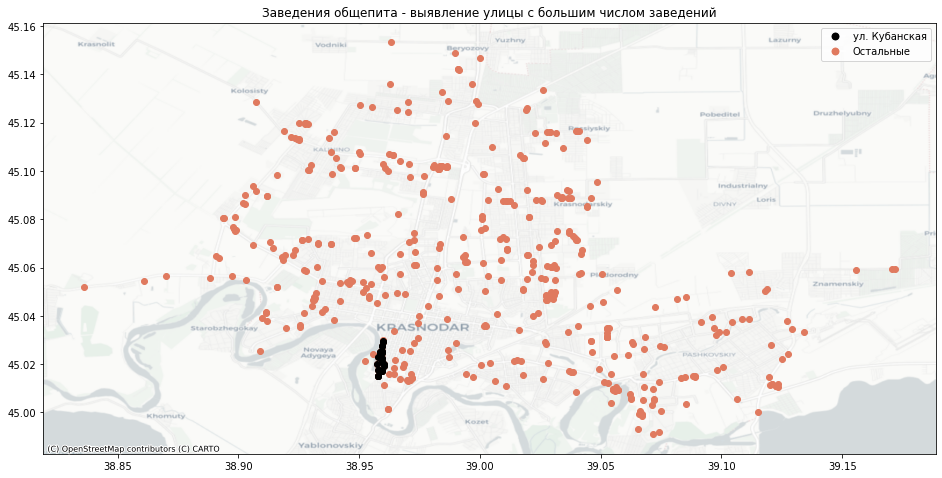

In [152]:
ax = gdf.loc[gdf.category.str.contains('Общепит')].plot(figsize = (16, 15), color = '#E07A5F', legend = True)
gdf.loc[(gdf.category.str.contains('Общепит')) & gdf.address.str.lower().str.contains('кубанская набережная')].plot(ax = ax, color = 'k', legend = True)
cx.add_basemap(ax, crs = db.crs, source = cx.providers.CartoDB.Positron)
plt.title('Заведения общепита - выявление улицы с большим числом заведений')
legend_elements = [Line2D([0], [0], marker='o', color = 'white',label='ул. Кубанская',markerfacecolor='black', markersize=9),
                   Line2D([0], [0], marker='o', color = 'white', label='Остальные',markerfacecolor='#E07A5F', markersize=9)]
plt.legend(handles = legend_elements)


In [127]:
print(cx.providers.CartoDB.keys())

dict_keys(['Positron', 'PositronNoLabels', 'PositronOnlyLabels', 'DarkMatter', 'DarkMatterNoLabels', 'DarkMatterOnlyLabels', 'Voyager', 'VoyagerNoLabels', 'VoyagerOnlyLabels', 'VoyagerLabelsUnder'])
